In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv"
df = pd.read_csv(url)


print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [31]:

missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with Null values:", missing_columns)


Columns with Null values: ['Age', 'Cabin', 'Embarked']


In [33]:

df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Cabin"].fillna("Unknown", inplace=True)


C:\Users\WALTON\AppData\Local\Temp\ipykernel_6928\2818980722.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)
C:\Users\WALTON\AppData\Local\Temp\ipykernel_6928\2818980722.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

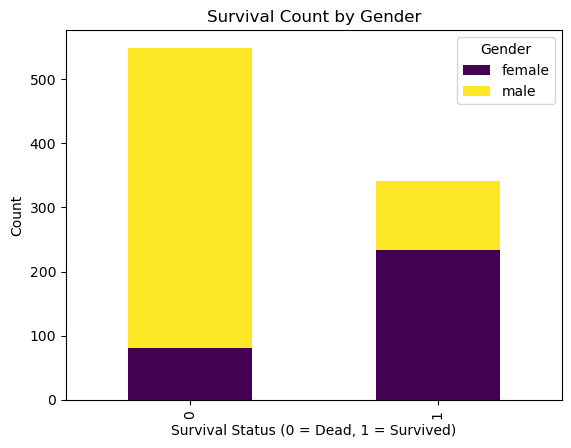

In [35]:

survival_counts = df.groupby(["Survived", "Sex"]).size().unstack()

survival_counts.plot(kind="bar", stacked=True, colormap="viridis")
plt.xlabel("Survival Status (0 = Dead, 1 = Survived)")
plt.ylabel("Count")
plt.title("Survival Count by Gender")
plt.legend(title="Gender")
plt.show()


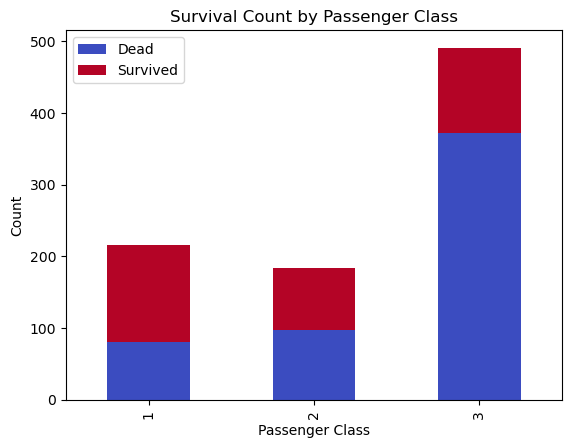

In [37]:

pclass_counts = df.groupby(["Pclass", "Survived"]).size().unstack()

pclass_counts.plot(kind="bar", stacked=True, colormap="coolwarm")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Survival Count by Passenger Class")
plt.legend(["Dead", "Survived"])
plt.show()


In [41]:

def assign_age_class(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4


df["AgeClass"] = df["Age"].apply(assign_age_class)


print(df[["Age", "AgeClass"]].head(10))


         Age  AgeClass
0  22.000000         1
1  38.000000         3
2  26.000000         1
3  35.000000         2
4  35.000000         2
5  29.699118         2
6  54.000000         3
7   2.000000         0
8  27.000000         2
9  14.000000         0


In [43]:
df.drop(columns=["Age"], inplace=True)
print(df.head()) 


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket     Fare    Cabin Embarked  AgeClass  
0         A/5 21171   7.2500  Unknown        S         1  
1          PC 17599  71.2833      C85        C         3  
2  STON/O2. 3101282   7.9250  Unknown        S         1  
3            113803  53.1000     C123        S         2  
4            373450

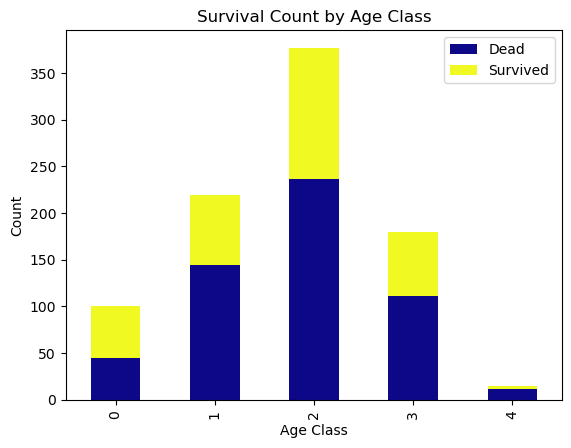

In [45]:

ageclass_counts = df.groupby(["AgeClass", "Survived"]).size().unstack()


ageclass_counts.plot(kind="bar", stacked=True, colormap="plasma")
plt.xlabel("Age Class")
plt.ylabel("Count")
plt.title("Survival Count by Age Class")
plt.legend(["Dead", "Survived"])
plt.show()


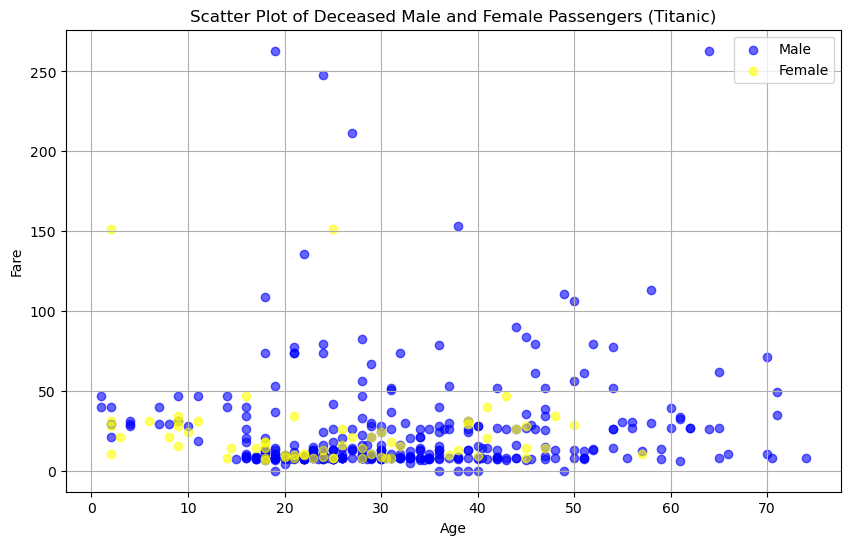

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("titanic.csv")  # Adjust path if needed


dead_passengers = df[df["Survived"] == 0]


male_dead = dead_passengers[dead_passengers["Sex"] == "male"]
female_dead = dead_passengers[dead_passengers["Sex"] == "female"]

plt.figure(figsize=(10, 6))
plt.scatter(male_dead["Age"], male_dead["Fare"], color="blue", label="Male", alpha=0.6)
plt.scatter(female_dead["Age"], female_dead["Fare"], color="yellow", label="Female", alpha=0.6)


plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter Plot of Deceased Male and Female Passengers (Titanic)")
plt.legend()
plt.grid(True)


plt.show()
